In [81]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
#rcParams['figure.figsize'] = 80,50

In [2]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [3]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [149]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain.iloc[:,15000:])
imagesTest_scaled = scaler.transform(imagesTest.iloc[:,15000:])


In [180]:
#PCA conversion
pca = PCA(n_components = 250)

imagesTrain_pca = pca.fit_transform(imagesTrain_scaled)
imagesTest_pca = pca.transform(imagesTest_scaled)

imagesTrain_pca = pd.DataFrame(imagesTrain_pca) 
imagesTest_pca = pd.DataFrame(imagesTest_pca) 

In [134]:
pca.explained_variance_ratio_.sum()


0.9329740848681101

In [99]:
imagesTrain_pca

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,3.634626,14.328010,-2.224696,-5.618655,-14.748120,-1.529939,8.772573,-0.414372,-2.878491,7.478766,...,-1.426431,0.405819,0.496976,0.435516,-0.482505,0.478333,0.018517,-0.138803,0.272884,0.364647
1,7.568732,-9.042009,-9.751164,-3.886858,3.865629,-15.614192,2.709768,-0.459586,1.954988,-1.126289,...,-0.461671,1.466232,0.416671,-0.955935,1.143835,1.009992,0.911073,1.841294,-1.163416,0.233611
2,5.188956,-2.589047,-1.242633,0.761267,-1.186619,-5.787477,-0.896907,-2.376502,1.329449,-2.260873,...,-0.121598,-1.304629,-0.107455,0.216543,-0.263470,0.157725,-0.206732,-0.099544,-0.339603,0.188890
3,-15.413568,-20.533693,-4.410322,-2.074331,13.281615,-6.419273,-6.791605,11.368739,-0.739513,1.595788,...,0.175438,0.120957,0.011381,-0.967110,-0.462414,-0.490177,0.481646,-0.772371,-0.863075,-1.146522
4,22.164102,13.497635,1.532027,4.549472,-12.722542,4.998044,11.344331,-5.854603,2.329585,0.762624,...,0.462978,-0.183728,0.029354,0.133069,0.385381,-0.970544,-0.892828,-0.184929,0.002425,0.640400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-17.778996,6.040498,-13.509370,-13.520372,2.913888,-18.582786,-5.034302,-3.699392,2.318479,-7.377960,...,-0.732746,0.557761,0.956747,0.375552,-1.517934,-0.364902,-0.462314,0.346128,0.333631,0.666726
4996,8.591553,5.289902,22.157819,-8.183473,-0.280500,-12.430678,-0.683722,1.972563,0.281960,0.208735,...,0.050839,1.243507,-0.322793,-0.223800,0.867854,0.274098,-0.028692,0.452275,-0.628448,0.022988
4997,0.667289,-4.331263,3.789234,-4.483929,-4.474864,-4.295008,4.357007,-3.939184,-0.379716,4.864054,...,0.956415,0.564542,0.230850,-0.060591,0.309961,-0.407324,-0.197227,-0.306885,-0.323710,0.133564
4998,-8.132844,-3.307689,4.452826,0.930309,-0.327852,-4.305234,-3.021857,1.517129,-2.516155,1.206015,...,-0.257596,-0.882473,-0.093216,0.011450,0.270448,-0.447377,-0.127998,0.471332,0.741891,0.115307


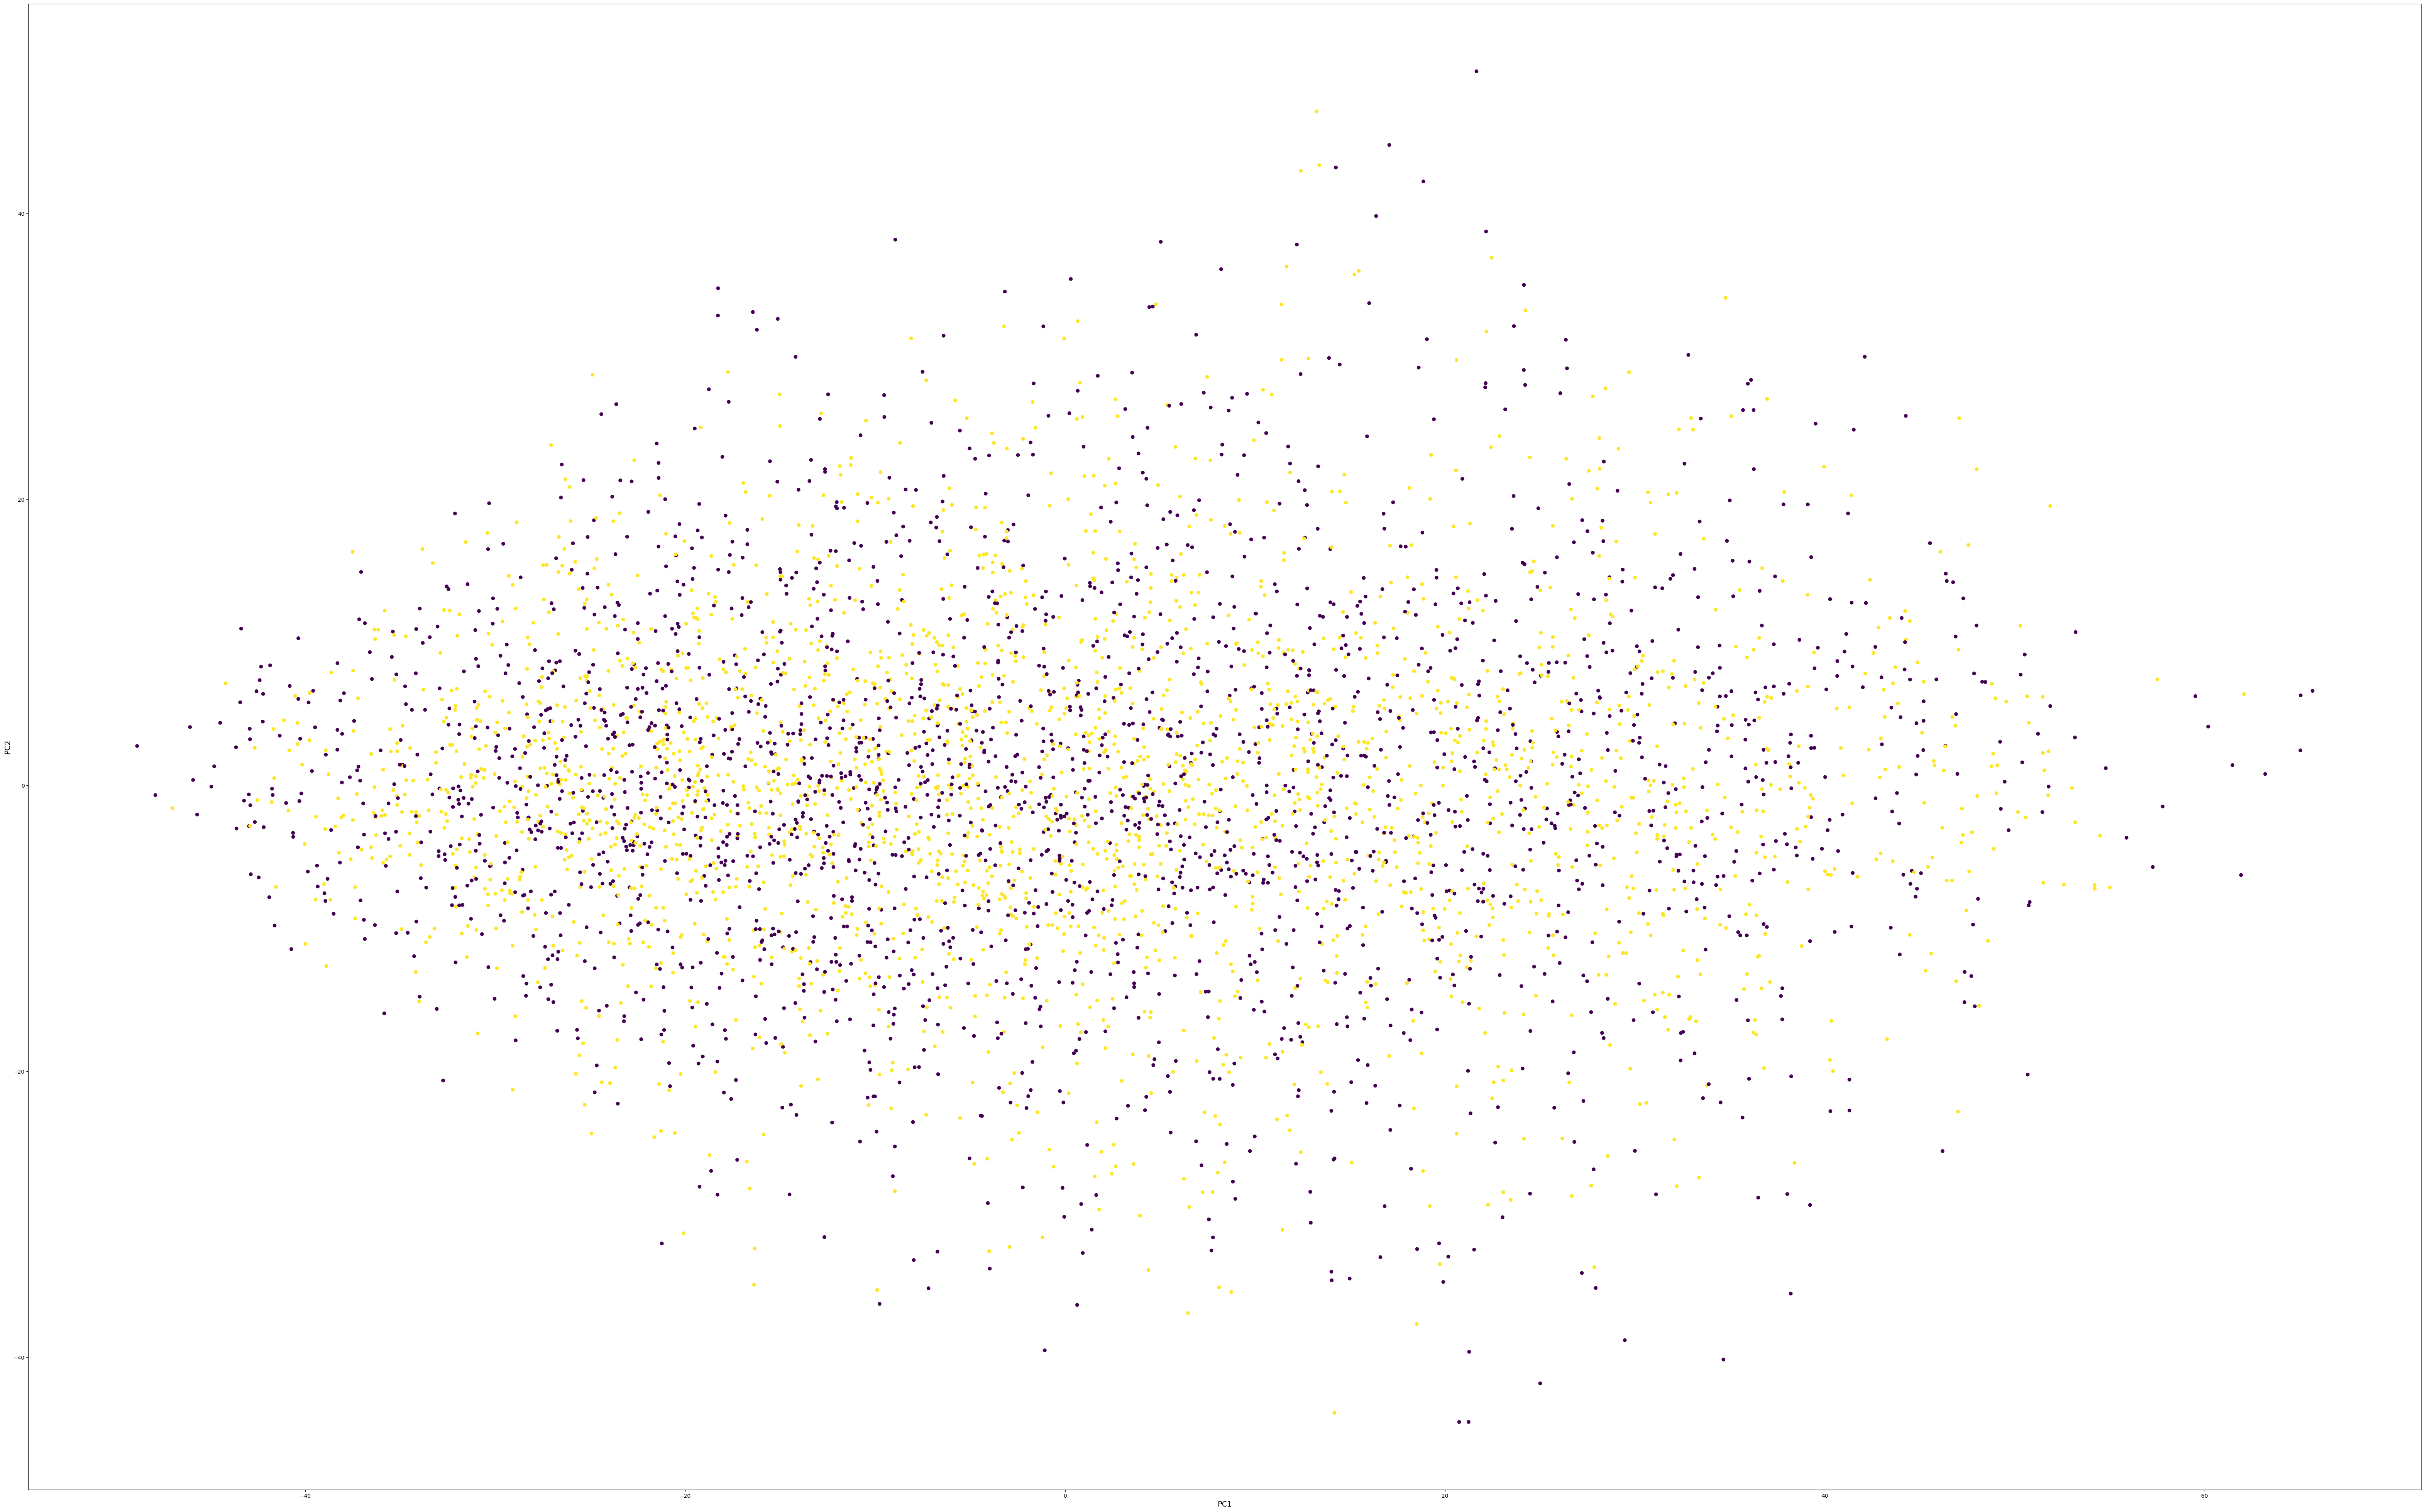

In [181]:
ax = plt.axes()
#ax.set_facecolor("black")
plt.scatter(imagesTrain_pca.iloc[:,0],imagesTrain_pca.iloc[:,1] ,c=labelsTrain['smiling'])
plt.xlabel("PC1" , size=14)
plt.ylabel("PC2" , size=14)
#plt.axis = ("equal")

plt.show()
# classification does not coincide with variation in data

In [191]:
#decision tree#####
model = tree.DecisionTreeClassifier(max_depth=5 ,criterion = 'gini')
model.fit(imagesTrain_pca,labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.714

In [189]:
#logistic regression is more accurate that decision tree#####
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(imagesTrain_pca, labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.886

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [31]:
hyper_params = {
    'max_features' : [i*5 for i in range(1,30)],
    'max_depth' : [1,2,3,4,5,6,7,None]
}

In [37]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [38]:
grid.fit(imagesTrain_pca,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145]})

In [39]:
grid.best_params_

{'max_depth': 4, 'max_features': 145}

[Text(0.5, 0.9166666666666666, 'X[20] <= -0.385\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.75, 'X[20] <= -2.264\ngini = 0.423\nsamples = 2247\nvalue = [1565, 682]'),
 Text(0.125, 0.5833333333333334, 'X[11] <= 2.722\ngini = 0.33\nsamples = 1071\nvalue = [848, 223]'),
 Text(0.0625, 0.4166666666666667, 'X[23] <= 1.713\ngini = 0.387\nsamples = 740\nvalue = [546, 194]'),
 Text(0.03125, 0.25, 'X[36] <= -1.256\ngini = 0.327\nsamples = 558\nvalue = [443, 115]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.443\nsamples = 151\nvalue = [101, 50]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.268\nsamples = 407\nvalue = [342, 65]'),
 Text(0.09375, 0.25, 'X[35] <= -1.835\ngini = 0.491\nsamples = 182\nvalue = [103, 79]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.423\nsamples = 46\nvalue = [14, 32]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.452\nsamples = 136\nvalue = [89, 47]'),
 Text(0.1875, 0.4166666666666667, 'X[6] <= -6.713\ngini = 0.16\nsamples = 331\n

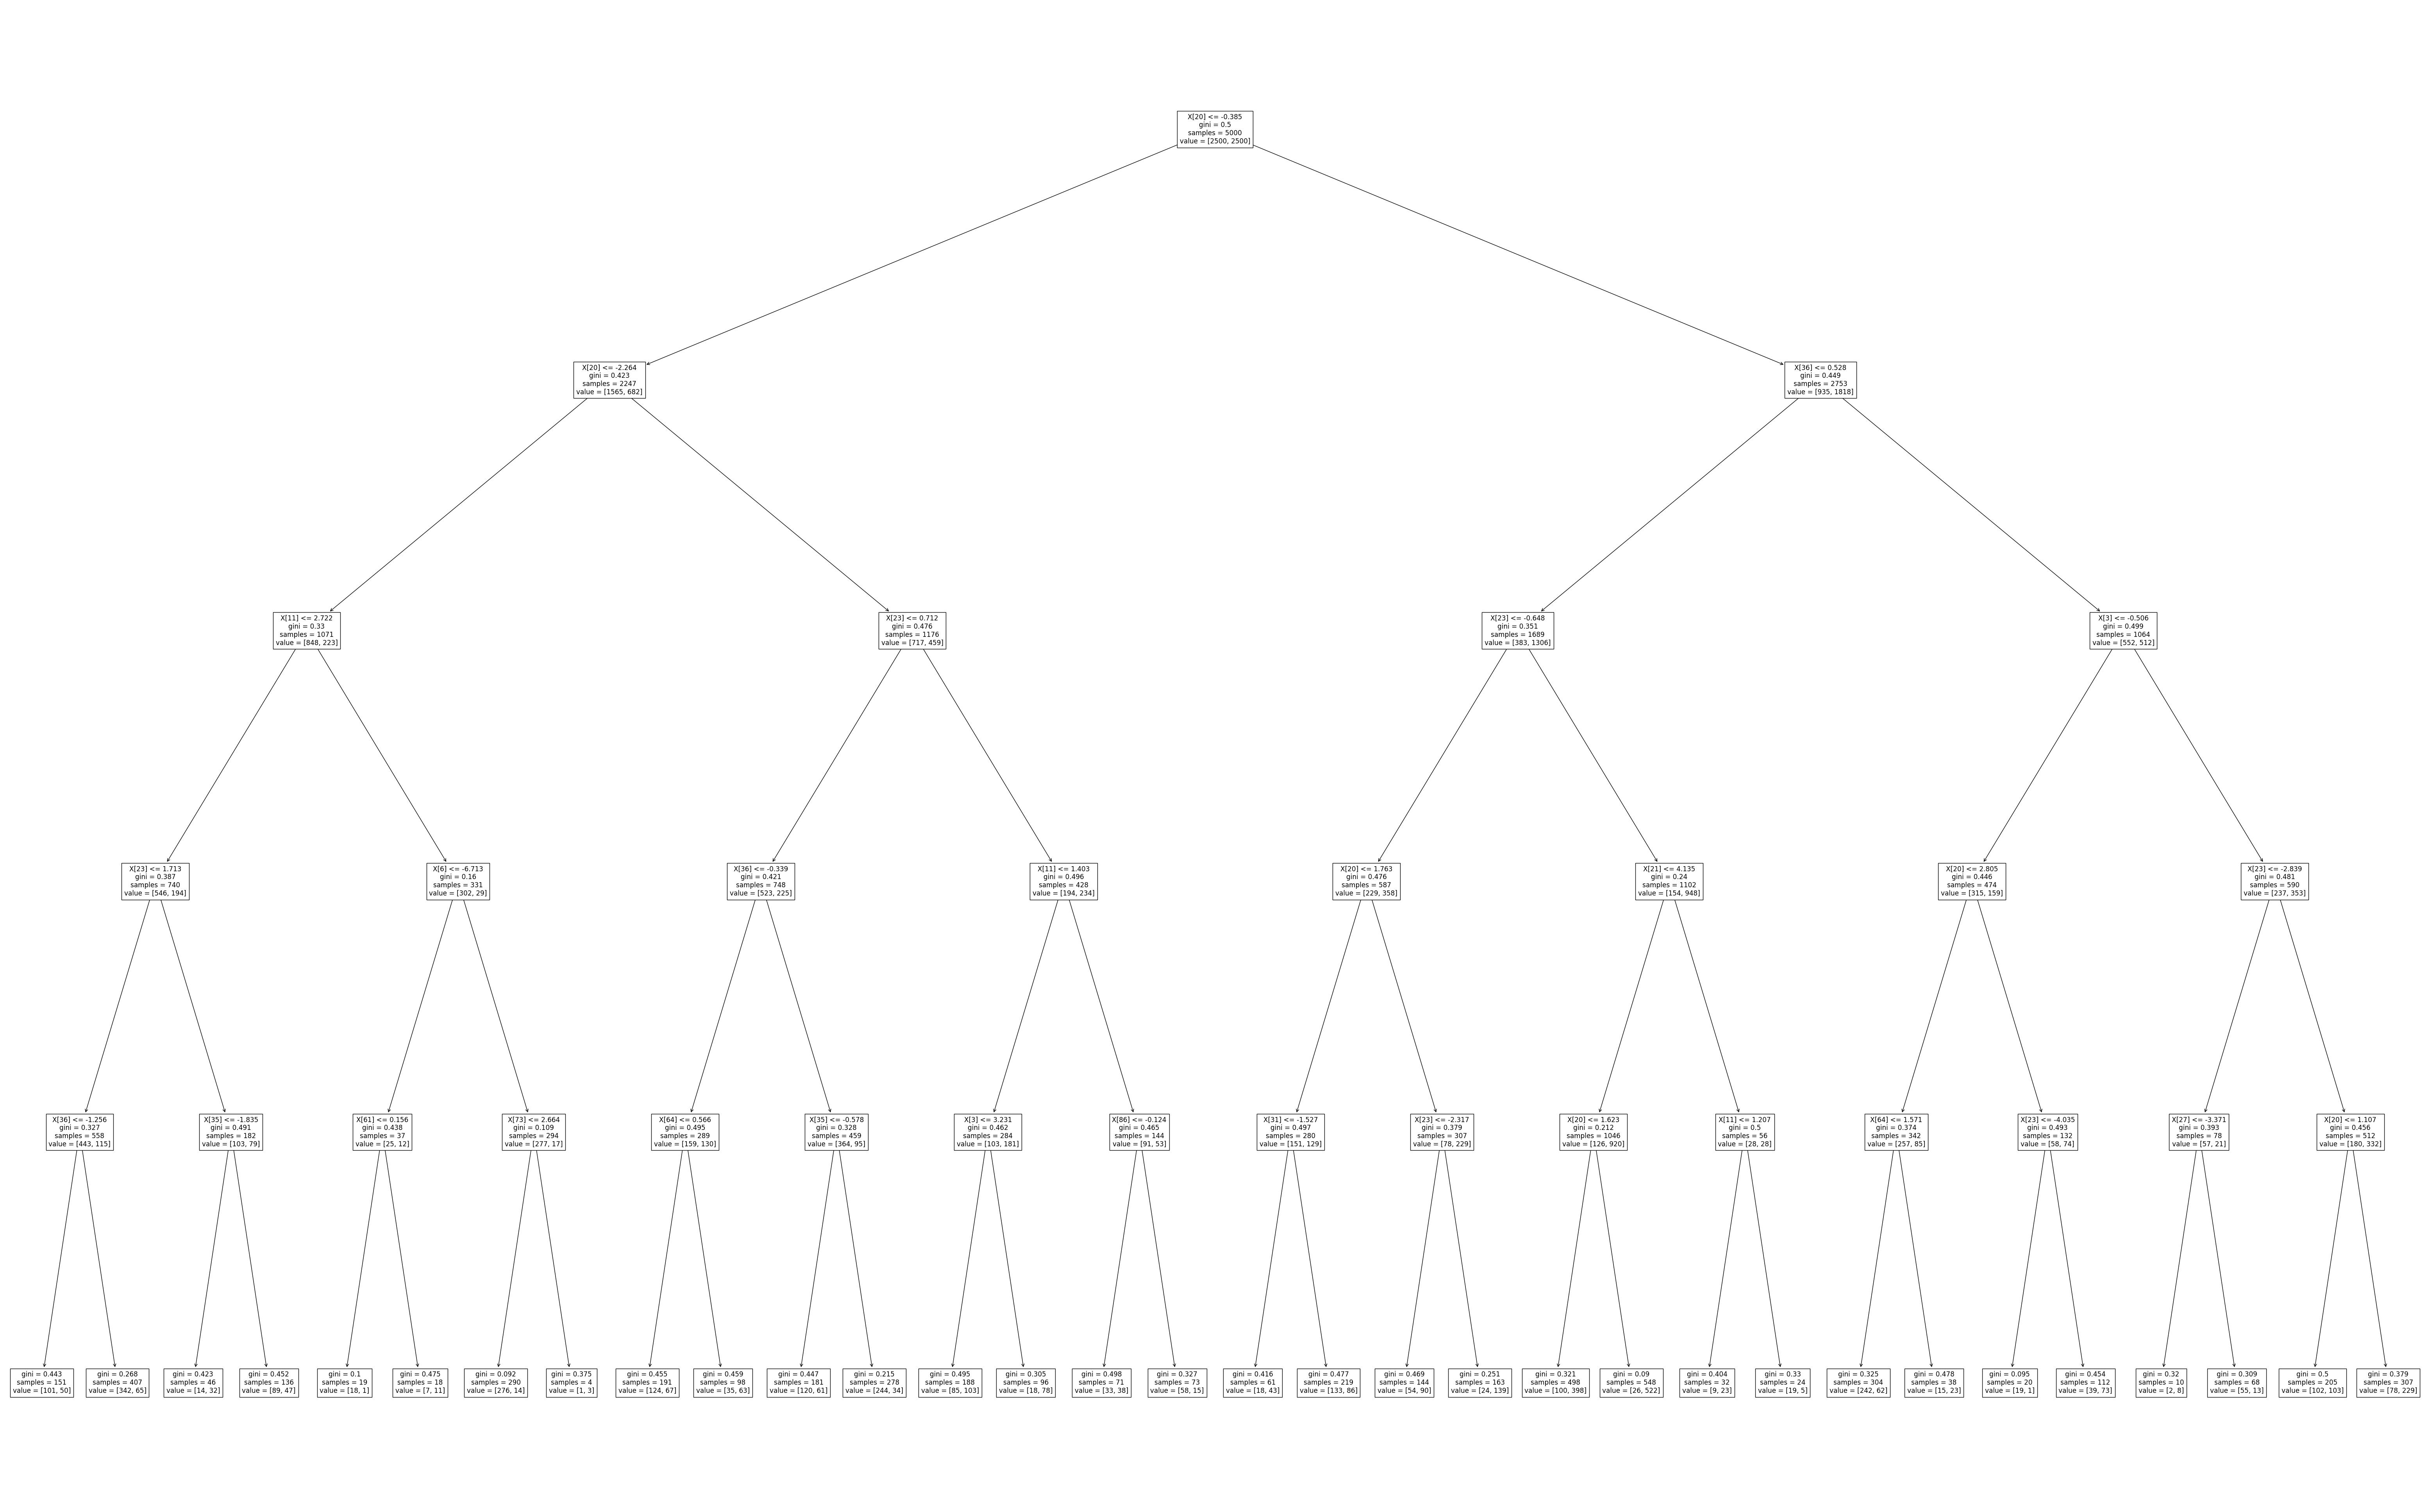

In [192]:
plot_tree(model)